In [1]:
import numpy as np
import matplotlib.pyplot as plt
from surf import *
%load_ext autoreload

In [2]:
%autoreload
board = Board('../boardd.json')

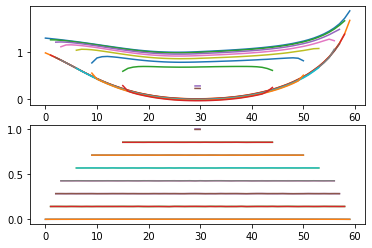

In [5]:

f, (ax1, ax2) = plt.subplots(2, 1)
n_points = 60
for p in np.linspace(0, 1, 8):
    points = []

    for k in np.linspace(0, 1, n_points):
        pts = board.get_cut(k).get(p)
        if pts:
            points.append(pts)

    points = np.array(points)
    pad = (n_points - len(points))//2
    ax1.plot(np.pad(points[:, 0, 1], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax1.plot(np.pad(points[:, 1, 1], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax2.plot(np.pad(points[:, 0, 0], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax2.plot(np.pad(points[:, 1, 0], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
plt.show()

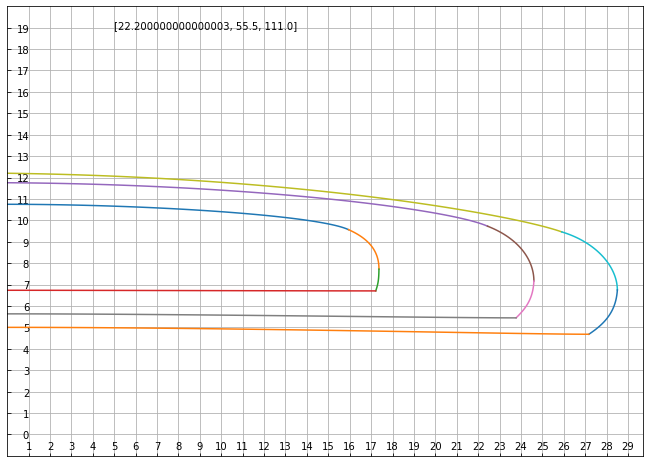

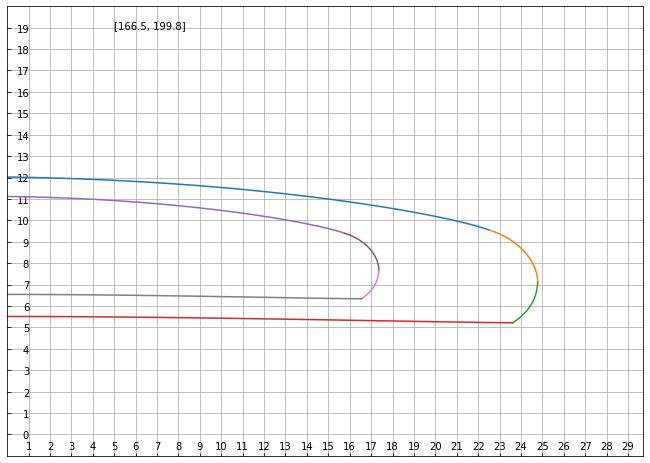

In [6]:
offset = {
    0.1: 2,
    0.25: 4,
    0.5: 5,
    0.75: 4,
    0.9: 1.5
}


for cuts in [[0.1, 0.25, 0.5], [0.75, 0.9]]:
    f, ax = plt.subplots(figsize=(11.69,8.27))
    for cut in cuts:
        board.get_cut(cut).transform(board.width, board.thickness, 0, offset[cut]).plot(ax=ax)
        ax.set_aspect('equal')
        ax.set_ylim(-1,20)
        ax.set_xlim(0,29.7)
    #     plt.axis('off')

        ax.tick_params(axis="y",direction="in", pad=-22)
        ax.tick_params(axis="x",direction="in", pad=-15)
    plt.text(5, 19, f'{[c*222 for c in cuts]}')
    plt.xticks(range(1, 30))
    plt.yticks(range(0, 20))
    plt.grid()
    plt.savefig(f'{cuts}.pdf', bbox_inches='tight', format='pdf', pad_inches = 0)
    

In [4]:
result = board.get_obj()
with open('board.obj', 'w+') as f:
    f.write(result)